In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/Cup IT/2. Cup_IT_2022.csv") ### указываете путь до сета

In [5]:
df

,client_id,is_in_club,cnt_checks_10_Мясная гастрономия,rto_std_11,rto_6,rto_12_Сыры,rto_12_Птица и изделия из птицы,rto_8,cnt_checks_9,rto_9_Мясная гастрономия,...,rto_stddev_12_Сыры,rto_6_Крупы и зерновые,rto_stddev_7_Рыба и рыбные изделия,rto_stddev_8_Овощи - Фрукты,rto_8_Рыба и рыбные изделия,rto_11_Сыры,cnt_checks_8_Сыры,cnt_checks_8,rto_stddev_9_Мясная гастрономия,rto_stddev_12_Крупы и зерновые
0,0,0,NaN,300.021342,2418.116714,853.016746,NaN,5092.170392,3.0,NaN,...,73.846425,148.316558,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
1,1,0,1.0,519.031384,19899.211736,NaN,NaN,32392.636661,7.0,NaN,...,NaN,NaN,225.219998,301.404157,525.868862,1153.293331,7.0,21.0,NaN,NaN
2,2,0,NaN,131.165948,411.347689,NaN,NaN,1416.656061,NaN,NaN,...,NaN,NaN,NaN,6.651813,NaN,NaN,NaN,5.0,NaN,NaN
3,3,0,2.0,NaN,35043.643030,NaN,NaN,8460.544337,7.0,1425.707450,...,NaN,NaN,NaN,NaN,743.245025,NaN,NaN,4.0,104.784828,NaN
4,4,0,1.0,856.579037,8992.835847,NaN,NaN,4914.387768,14.0,663.142041,...,NaN,NaN,NaN,30.906907,NaN,533.725164,2.0,6.0,143.967128,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135056,135056,0,NaN,196.068192,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,97.138634,NaN,NaN,NaN,NaN
135057,135057,0,1.0,402.034438,NaN,638.046313,241.225584,NaN,3.0,109.331686,...,65.491622,NaN,NaN,NaN,NaN,197.113099,NaN,NaN,NaN,NaN
135058,135058,0,NaN,512.741089,NaN,283.611949,NaN,NaN,2.0,NaN,...,2.670624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135059,135059,0,NaN,124.425093,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
categories = ["Мясная гастрономия", "Сыры", "Птица и изделия из птицы", "Рыба и рыбные изделия", "Овощи - Фрукты", "Крупы и зерновые"]
all_products = []
for i in categories:
  x = []
  for j in df.columns:
    if i in j:
      x.append(j)
  all_products.append(x) 
### разделил все фичи на категории

In [7]:
### сумма чеков
### мясо
checks_meat = pd.Series([0] * 135061)
for i in all_products[0]:
  if "cnt_checks" in i:
    checks_meat = checks_meat.add(df[i], fill_value = 0)

### сыр
checks_cheese = pd.Series([0] * 135061)
for i in all_products[1]:
  if "cnt_checks" in i:
    checks_cheese = checks_cheese.add(df[i], fill_value = 0)

### птица
checks_bird = pd.Series([0] * 135061)
for i in all_products[2]:
  if "cnt_checks" in i:
    checks_bird = checks_bird.add(df[i], fill_value = 0)

### рыба
checks_fish = pd.Series([0] * 135061)
for i in all_products[3]:
  if "cnt_checks" in i:
    checks_fish = checks_fish.add(df[i], fill_value = 0)

### овощи
checks_veg = pd.Series([0] * 135061)
for i in all_products[4]:
  if "cnt_checks" in i:
    checks_veg = checks_veg.add(df[i], fill_value = 0)

### чеки крупы
checks_groat = pd.Series([0] * 135061)
for i in all_products[5]:
  if "cnt_checks" in i:
    checks_groat = checks_groat.add(df[i], fill_value = 0)

In [8]:
### мясо
rto_stddev_meat = []
for i in all_products[0]:
  if "rto_stddev" in i:
    rto_stddev_meat.append(i)

### сыр
rto_stddev_cheese = []
for i in all_products[1]:
  if "rto_stddev" in i:
    rto_stddev_cheese.append(i)

### птица
rto_stddev_bird = []
for i in all_products[2]:
  if "rto_stddev" in i:
    rto_stddev_bird.append(i)

### рыба
rto_stddev_fish = []
for i in all_products[3]:
  if "rto_stddev" in i:
    rto_stddev_fish.append(i)

### овощи
rto_stddev_veg = []
for i in all_products[4]:
  if "rto_stddev" in i:
    rto_stddev_veg.append(i)

### крупы
rto_stddev_groat = []
for i in all_products[5]:
  if "rto_stddev" in i:
    rto_stddev_groat.append(i)

In [9]:
### среднее rto_stddev по категориям
mean_rto_stddev_meat = df[rto_stddev_meat].mean(axis = 1)

mean_rto_stddev_cheese = df[rto_stddev_cheese].mean(axis = 1)

mean_rto_stddev_bird = df[rto_stddev_bird].mean(axis = 1)

mean_rto_stddev_fish = df[rto_stddev_fish].mean(axis = 1)

mean_rto_stddev_veg = df[rto_stddev_veg].mean(axis = 1)

mean_rto_stddev_groat = df[rto_stddev_groat].mean(axis = 1)

In [10]:
### среднее rto по категориям
mean_rto_meat = df[['rto_6_Мясная гастрономия', 'rto_7_Мясная гастрономия', 'rto_8_Мясная гастрономия',
                    'rto_9_Мясная гастрономия', 'rto_10_Мясная гастрономия', 'rto_11_Мясная гастрономия',
                    'rto_12_Мясная гастрономия']].mean(axis = 1)

mean_rto_cheese = df[['rto_6_Сыры', 'rto_7_Сыры', 'rto_8_Сыры',
                    'rto_9_Сыры', 'rto_10_Сыры', 'rto_11_Сыры',
                    'rto_12_Сыры']].mean(axis = 1)

mean_rto_bird = df[['rto_6_Птица и изделия из птицы', 'rto_7_Птица и изделия из птицы', 'rto_8_Птица и изделия из птицы',
                    'rto_9_Птица и изделия из птицы', 'rto_10_Птица и изделия из птицы', 'rto_11_Птица и изделия из птицы',
                    'rto_12_Птица и изделия из птицы']].mean(axis = 1)

mean_rto_fish = df[['rto_6_Рыба и рыбные изделия', 'rto_7_Рыба и рыбные изделия', 'rto_8_Рыба и рыбные изделия',
                    'rto_9_Рыба и рыбные изделия', 'rto_10_Рыба и рыбные изделия', 'rto_11_Рыба и рыбные изделия',
                    'rto_12_Рыба и рыбные изделия']].mean(axis = 1)

mean_rto_veg = df[['rto_6_Овощи - Фрукты', 'rto_7_Овощи - Фрукты', 'rto_8_Овощи - Фрукты',
                    'rto_9_Овощи - Фрукты', 'rto_10_Овощи - Фрукты', 'rto_11_Овощи - Фрукты',
                    'rto_12_Овощи - Фрукты']].mean(axis = 1)

mean_rto_groat = df[['rto_6_Крупы и зерновые', 'rto_7_Крупы и зерновые', 'rto_8_Крупы и зерновые',
                    'rto_9_Крупы и зерновые', 'rto_10_Крупы и зерновые', 'rto_11_Крупы и зерновые',
                    'rto_12_Крупы и зерновые']].mean(axis = 1)

In [11]:
### среднее rto и checks
mean_rto = df[['rto_6', 'rto_7', 'rto_8', 'rto_9', 'rto_10', 'rto_11', 'rto_12']].mean(axis = 1)
mean_checks = df[["cnt_checks_6", "cnt_checks_7", "cnt_checks_8", "cnt_checks_9", "cnt_checks_10", "cnt_checks_11", "cnt_checks_12"]].mean(axis = 1)

In [12]:
new_df = pd.DataFrame({"client_id": df["client_id"], 
                       "is_in_club": df["is_in_club"], 
                       ###
                       "mean_rto": mean_rto,
                       "mean_checks": mean_checks,
                       ###
                       "mean_rto_meat": mean_rto_meat,
                       "mean_rto_cheese": mean_rto_cheese,
                       "mean_rto_bird": mean_rto_bird,
                       "mean_rto_fish": mean_rto_fish,
                       "mean_rto_veg": mean_rto_veg,
                       "mean_rto_groat": mean_rto_groat,
                       ###
                       "mean_rto_stddev_meat": mean_rto_stddev_meat,
                       "mean_rto_stddev_cheese": mean_rto_stddev_cheese,
                       "mean_rto_stddev_bird": mean_rto_stddev_bird,
                       "mean_rto_stddev_fish": mean_rto_stddev_fish,
                       "mean_rto_stddev_veg": mean_rto_stddev_veg,
                       "mean_rto_stddev_groat": mean_rto_stddev_groat,
                       ###
                       "checks_meat": checks_meat,
                       "checks_cheese": checks_cheese,
                       "checks_bird": checks_bird,
                       "checks_fish": checks_fish,
                       "checks_veg": checks_veg,
                       "checks_groat": checks_groat})


In [13]:
new_df

,client_id,is_in_club,mean_rto,mean_checks,mean_rto_meat,mean_rto_cheese,mean_rto_bird,mean_rto_fish,mean_rto_veg,mean_rto_groat,...,mean_rto_stddev_bird,mean_rto_stddev_fish,mean_rto_stddev_veg,mean_rto_stddev_groat,checks_meat,checks_cheese,checks_bird,checks_fish,checks_veg,checks_groat
0,0,0,2664.691420,4.714286,NaN,853.016746,NaN,NaN,423.435983,148.316558,...,NaN,NaN,61.086192,NaN,0.0,3.0,0.0,0.0,5.0,1.0
1,1,0,18529.459388,11.500000,212.857512,1151.057702,202.833900,1621.288708,6447.688412,160.913398,...,NaN,262.564114,168.793251,NaN,2.0,18.0,2.0,11.0,60.0,1.0
2,2,0,739.942187,3.000000,NaN,NaN,421.193294,NaN,129.506753,NaN,...,NaN,NaN,21.043027,NaN,0.0,0.0,1.0,0.0,6.0,0.0
3,3,0,14697.438189,6.166667,1433.520754,NaN,340.328674,1224.155863,455.366702,NaN,...,NaN,NaN,44.926098,NaN,16.0,0.0,2.0,3.0,13.0,0.0
4,4,0,10180.487370,11.714286,710.354605,341.135272,384.160930,NaN,787.090379,NaN,...,112.417432,NaN,52.764662,NaN,10.0,9.0,4.0,0.0,25.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135056,135056,0,1120.482965,4.000000,126.719474,139.503809,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,2.0,0.0,0.0,0.0,0.0
135057,135057,0,6856.502896,10.000000,295.278321,309.586488,247.711530,NaN,682.415261,78.285354,...,28.734138,NaN,26.083663,15.902444,9.0,6.0,4.0,0.0,24.0,2.0
135058,135058,0,6276.989554,9.250000,133.210188,197.014459,NaN,NaN,502.034700,NaN,...,NaN,NaN,79.567133,NaN,1.0,5.0,0.0,0.0,8.0,0.0
135059,135059,0,2422.046498,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
### процент пропусков
for i in new_df.columns:
  print(i + ": " +  str(round(sum(new_df[i].isna()) / 135061 * 100, 2)) + "%")

client_id: 0.0%
is_in_club: 0.0%
mean_rto: 0.0%
mean_checks: 0.0%
mean_rto_meat: 14.65%
mean_rto_cheese: 12.35%
mean_rto_bird: 25.2%
mean_rto_fish: 75.39%
mean_rto_veg: 2.9%
mean_rto_groat: 38.75%
mean_rto_stddev_meat: 33.34%
mean_rto_stddev_cheese: 30.52%
mean_rto_stddev_bird: 49.05%
mean_rto_stddev_fish: 91.52%
mean_rto_stddev_veg: 7.0%
mean_rto_stddev_groat: 67.71%
checks_meat: 0.0%
checks_cheese: 0.0%
checks_bird: 0.0%
checks_fish: 0.0%
checks_veg: 0.0%
checks_groat: 0.0%


In [15]:
### заполнение NaN-ов нулями
new_df_zero = new_df.fillna(0)

In [16]:
new_df_zero = new_df_zero.drop(["client_id"], axis = 1)

(array([122643.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  12418.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

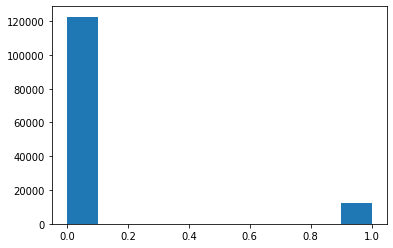

In [17]:
### распределение таргета
plt.hist(new_df_zero["is_in_club"])

In [18]:
new_df_zero.corr()

,is_in_club,mean_rto,mean_checks,mean_rto_meat,mean_rto_cheese,mean_rto_bird,mean_rto_fish,mean_rto_veg,mean_rto_groat,mean_rto_stddev_meat,...,mean_rto_stddev_bird,mean_rto_stddev_fish,mean_rto_stddev_veg,mean_rto_stddev_groat,checks_meat,checks_cheese,checks_bird,checks_fish,checks_veg,checks_groat
is_in_club,1.000000,0.161815,0.133375,0.088549,0.161575,0.128320,0.057165,0.162821,0.097689,0.061787,...,0.107160,0.043630,0.045514,0.096130,0.134949,0.204355,0.166069,0.074305,0.197231,0.145441
mean_rto,0.161815,1.000000,0.590201,0.693085,0.655910,0.541746,0.287074,0.715619,0.433085,0.338340,...,0.327466,0.207173,0.275611,0.292827,0.706904,0.701199,0.591324,0.326983,0.697197,0.512507
mean_checks,0.133375,0.590201,1.000000,0.342914,0.285668,0.297989,0.099356,0.389584,0.212084,0.128122,...,0.171402,0.082934,0.071197,0.151491,0.537663,0.492444,0.447952,0.177676,0.685135,0.371895
mean_rto_meat,0.088549,0.693085,0.342914,1.000000,0.511718,0.399869,0.207613,0.461125,0.287581,0.554415,...,0.257560,0.143493,0.206720,0.190681,0.780152,0.513029,0.415336,0.203578,0.441250,0.311317
mean_rto_cheese,0.161575,0.655910,0.285668,0.511718,1.000000,0.392809,0.234966,0.541028,0.349925,0.299491,...,0.252416,0.159889,0.256772,0.248092,0.460715,0.750608,0.392358,0.242677,0.462574,0.371883
mean_rto_bird,0.128320,0.541746,0.297989,0.399869,0.392809,1.000000,0.199274,0.457450,0.340032,0.218826,...,0.613314,0.134796,0.158322,0.227508,0.417770,0.435186,0.753183,0.224451,0.455216,0.414689
mean_rto_fish,0.057165,0.287074,0.099356,0.207613,0.234966,0.199274,1.000000,0.245949,0.149985,0.152857,...,0.160623,0.599900,0.141577,0.111811,0.164695,0.195926,0.178031,0.593778,0.191928,0.140637
mean_rto_veg,0.162821,0.715619,0.389584,0.461125,0.541028,0.457450,0.245949,1.000000,0.389816,0.238451,...,0.268849,0.178413,0.413749,0.271418,0.453687,0.541942,0.479234,0.289279,0.723227,0.455821
mean_rto_groat,0.097689,0.433085,0.212084,0.287581,0.349925,0.340032,0.149985,0.389816,1.000000,0.175753,...,0.216543,0.103391,0.169301,0.634326,0.269696,0.338115,0.325944,0.165622,0.358636,0.635844
mean_rto_stddev_meat,0.061787,0.338340,0.128122,0.554415,0.299491,0.218826,0.152857,0.238451,0.175753,1.000000,...,0.197005,0.101383,0.194548,0.127736,0.333822,0.240350,0.180749,0.117651,0.196145,0.137345


In [19]:
### удаляю сильно кореллирующие признаки
new_df_zero = new_df_zero.drop(["checks_meat", "checks_cheese", "checks_bird", "checks_veg"], axis = 1)

In [20]:
### нормализация
from sklearn.preprocessing import MinMaxScaler

new_df_zero_cols = new_df_zero.columns
scaler = MinMaxScaler()
new_df_zero_norm = pd.DataFrame(scaler.fit_transform(new_df_zero), columns = new_df_zero_cols)

In [21]:
### train test
from sklearn.model_selection import train_test_split

X = new_df_zero_norm.drop(["is_in_club"], axis = 1)
y = new_df_zero_norm["is_in_club"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle = False)


In [26]:
from sklearn.linear_model import LogisticRegression
lregress1 = LogisticRegression()
lregress1.fit(X_train, y_train.ravel())
prediction = lregress1.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     37618
         1.0       0.29      0.01      0.03      2901

    accuracy                           0.93     40519
   macro avg       0.61      0.51      0.49     40519
weighted avg       0.88      0.93      0.90     40519



In [27]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.2 MB/s 


In [28]:
import catboost

In [29]:
test_model = catboost.CatBoostClassifier(iterations = 1000)

In [30]:
test_model.fit(X_train, y_train, verbose = 100)

Learning rate set to 0.071866
0:	learn: 0.6272946	total: 78.4ms	remaining: 1m 18s
100:	learn: 0.2952582	total: 3.43s	remaining: 30.5s
200:	learn: 0.2888262	total: 8.6s	remaining: 34.2s
300:	learn: 0.2832003	total: 14.7s	remaining: 34.2s
400:	learn: 0.2785082	total: 22.2s	remaining: 33.2s
500:	learn: 0.2743126	total: 29.8s	remaining: 29.7s
600:	learn: 0.2700447	total: 36.6s	remaining: 24.3s
700:	learn: 0.2662067	total: 40.2s	remaining: 17.2s
800:	learn: 0.2627327	total: 42.8s	remaining: 10.6s
900:	learn: 0.2593318	total: 45.4s	remaining: 4.99s
999:	learn: 0.2559277	total: 48s	remaining: 0us


In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [32]:
report = classification_report(test_model.predict(X_test), y_test)
print(report)
print("roc_auc: ", roc_auc_score(test_model.predict(X_test), y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96     40360
         1.0       0.02      0.44      0.05       159

    accuracy                           0.93     40519
   macro avg       0.51      0.69      0.50     40519
weighted avg       0.99      0.93      0.96     40519

roc_auc:  0.685053932843403


#DL MODEL



In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import torch.optim as optim

In [34]:
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import Variable

In [129]:
train_tensor_X = torch.tensor(X_train.values)
train_tensor_Y = torch.tensor(y_train.values)

train_tensor = TensorDataset(train_tensor_X, train_tensor_Y) 
train_loader = DataLoader(dataset = train_tensor,batch_size = 1000, shuffle = False)

In [130]:
class BinaryClassification(nn.Module):
    def __init__(self):
        super(BinaryClassification, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(16, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        #x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        #x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [131]:
b_model = BinaryClassification()
ls_f = nn.BCEWithLogitsLoss()
optim = torch.optim.Adam(b_model.parameters())

In [132]:
def train_m(model, optimizer, loss_fn, epochs, data_tr):

    model.train()
    for e in range(1, epochs+1):
        if e%50 == 0:
            print("num of epoch: ", e)
        for X_batch, y_batch in data_tr:
            optimizer.zero_grad()
        
            y_pred = model(X_batch.float())
        
            loss = loss_fn(y_pred.float(), y_batch.unsqueeze(1).float())

            loss.backward()
            optimizer.step()

In [133]:
train_m(model = b_model, optimizer = optim, loss_fn = ls_f, epochs = 2000, data_tr = train_loader)

num of epoch:  50
num of epoch:  100
num of epoch:  150
num of epoch:  200
num of epoch:  250
num of epoch:  300
num of epoch:  350
num of epoch:  400
num of epoch:  450
num of epoch:  500
num of epoch:  550
num of epoch:  600
num of epoch:  650
num of epoch:  700
num of epoch:  750
num of epoch:  800
num of epoch:  850
num of epoch:  900
num of epoch:  950
num of epoch:  1000
num of epoch:  1050
num of epoch:  1100
num of epoch:  1150
num of epoch:  1200
num of epoch:  1250
num of epoch:  1300
num of epoch:  1350
num of epoch:  1400
num of epoch:  1450
num of epoch:  1500
num of epoch:  1550
num of epoch:  1600
num of epoch:  1650
num of epoch:  1700
num of epoch:  1750
num of epoch:  1800
num of epoch:  1850
num of epoch:  1900
num of epoch:  1950
num of epoch:  2000


In [139]:
test_tensor_X = torch.tensor(X_test.values)
test_tensor_Y = torch.tensor(y_test.values)

test_tensor = TensorDataset(test_tensor_X, test_tensor_Y) 
test_loader = DataLoader(dataset = test_tensor, batch_size = 1000, shuffle = False)

In [148]:
y_pred_list = []
b_model.eval()
with torch.no_grad():
    for X_batch, _ in test_loader:
        X_batch = X_batch
        y_test_pred = b_model(X_batch.float())
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_list.append(y_test_pred.numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [203]:
predict = []
for i in range(len(y_pred_list)):
    predict += y_pred_list[i]

In [204]:
for i in range(len(predict)):
    if predict[i] >= 0.14: ### менять для более оптимального результата
        predict[i] = 1
    else:
        predict[i] = 0

In [205]:
report = classification_report(predict, y_test)
print(report)
print("roc_auc: ", roc_auc_score(predict, y_test))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     36807
           1       0.26      0.20      0.23      3712

    accuracy                           0.87     40519
   macro avg       0.59      0.57      0.58     40519
weighted avg       0.86      0.87      0.87     40519

roc_auc:  0.5709140256772747


In [190]:
torch.save(b_model, "b_model.pth")